In [1]:
from qwikidata.sparql import (get_subclasses_of_item,
                              return_sparql_query_results)
from qwikidata.entity import WikidataItem, WikidataLexeme, WikidataProperty
from qwikidata.linked_data_interface import get_entity_dict_from_api
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

Asking for all documented mathematicians:

In [2]:
sparql_query = """
SELECT ?item ?itemLabel
WHERE
{
  ?item wdt:P106 wd:Q170790. # Occupation(P106) of mathematician(Q170790)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". } # Helps get the label in your language, if not, then en language
}
"""
res_math = return_sparql_query_results(sparql_query)

Asking for all documented philosophers:

In [3]:
sparql_query = """
SELECT ?item ?itemLabel
WHERE
{
  ?item wdt:P106 wd:Q4964182. # Occupation(P106) of philosopher(Q4964182)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". } # Helps get the label in your language, if not, then en language
}
"""
res_phil = return_sparql_query_results(sparql_query)

Asking for the intersection between all documented mathematicians and philosophers:

In [4]:
sparql_query = """
SELECT ?item ?itemLabel
WHERE{
{
  ?item wdt:P106 wd:Q4964182. # Occupation(P106) of philosopher(Q4964182)
  # SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". } # Helps get the label in your language, if not, then en language
}
{
  ?item wdt:P106 wd:Q170790. # Occupation(P106) of mathematician(Q170790)
  # SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". } # Helps get the label in your language, if not, then en language
}}
"""
res_math_phil = return_sparql_query_results(sparql_query)

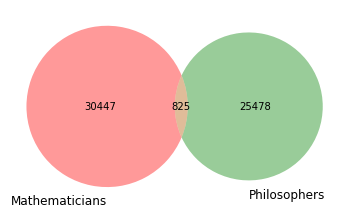

In WikiData there are documented:
    9763358 Humans
    30489 Mathematicians (0.312% of all humans)
    25501 Philosophers (0.261% of all humans)
    826 Mathematicians who were philosophers (1.497% of all mathematicians and philosophers)


In [8]:
num_of_humans=9763358       #taken manually due to a heavy query
num_of_maths=len(res_math['results']['bindings'])
num_of_philos=len(res_phil['results']['bindings'])
num_of_maths_philos=len(res_math_phil['results']['bindings'])

venn2(subsets = (num_of_maths, num_of_philos, num_of_maths_philos), set_labels = ('Mathematicians', 'Philosophers'))
plt.show()

print("In WikiData there are documented:")
print(f"    {num_of_humans} Humans")
print(f"    {num_of_maths} Mathematicians ({format(num_of_maths/num_of_humans*100,'.3f')}% of all humans)")
print(f"    {num_of_philos} Philosophers ({format(num_of_philos/num_of_humans*100,'.3f')}% of all humans)")
print(f"    {num_of_maths_philos} Mathematicians who were philosophers ({format(num_of_maths_philos/(num_of_maths+num_of_philos-num_of_maths_philos)*100,'.3f')}% of all mathematicians and philosophers)")

